In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Compare different factors in the California housing dataset

In [2]:
# Read in the California housing dataset
california_dataset = datasets.fetch_california_housing()
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target

In [5]:
# Observe the data structure
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# Reduce the dataset to remove AveRooms outliers
averooms_quartiles = np.quantile(housing_data["AveRooms"], [0.25, 0.5, 0.75])
q1 = averooms_quartiles[0]
q2 = averooms_quartiles[1]
q3 = averooms_quartiles[2]
iqr = q3-q1

lower_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)

housing_wo_outliers = housing_data.loc[(housing_data["AveRooms"] >= lower_bound) & (housing_data["AveRooms"] <= upper_bound), :]
housing_wo_outliers.sort_values("AveRooms")

2.023219161170969
8.469878027106942


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
4635,1.6953,43.0,2.032738,1.101190,942.0,1.401786,34.06,-118.30,1.50000
16809,3.2833,44.0,2.033019,0.919811,682.0,3.216981,37.66,-122.41,2.33300
4611,2.0185,9.0,2.042050,1.070959,1704.0,2.239159,34.06,-118.29,1.41700
7261,3.2188,39.0,2.043478,0.695652,51.0,2.217391,33.99,-118.21,1.12500
50,0.9218,21.0,2.045662,1.034247,735.0,1.678082,37.82,-122.27,1.71900
...,...,...,...,...,...,...,...,...,...
5272,13.6842,43.0,8.464844,0.992188,761.0,2.972656,34.04,-118.52,5.00001
1644,10.5815,11.0,8.465672,1.113433,959.0,2.862687,37.83,-121.94,5.00001
10332,10.1316,14.0,8.466513,1.020785,1400.0,3.233256,33.86,-117.76,5.00001
3542,9.6047,20.0,8.467890,0.969037,2795.0,3.205275,34.27,-118.57,5.00001


In [27]:
# Reduce the dataset to the San Diego Area (based on approx latitude & longitude area)
housing_sandiego = housing_wo_outliers.loc[((housing_wo_outliers["Latitude"] < 34) & (housing_wo_outliers["Latitude"] > 32)) & ((housing_wo_outliers["Longitude"] < -116) & (housing_wo_outliers["Longitude"] > -117.5)), :]
housing_sandiego.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
2761,1.7292,17.0,5.087719,1.649123,135.0,2.368421,33.33,-116.05,0.813
2766,2.8684,20.0,6.766102,1.745763,659.0,2.233898,33.41,-116.01,0.628
11872,2.9688,42.0,4.162544,0.922261,804.0,2.840989,33.99,-117.36,0.929
11878,2.7054,52.0,5.741214,1.060703,905.0,2.891374,33.99,-117.38,1.417
11879,2.0284,52.0,4.511905,1.132937,1167.0,2.315476,33.98,-117.38,1.016


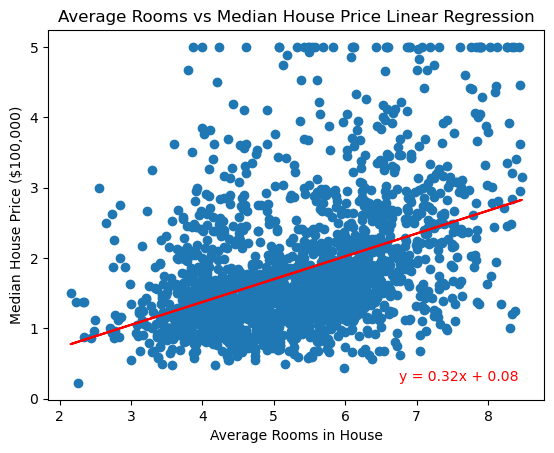

In [31]:
# Plot out rooms versus median house price
#Isolate the data
rooms = housing_sandiego["AveRooms"]
medprice = housing_sandiego["MEDV"]

#Calculate the Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(rooms, medprice)
regress_values = rooms * slope + intercept

#Save the line equation for printing
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#Plot the data
plt.scatter(rooms, medprice)
plt.title("Average Rooms vs Median House Price Linear Regression")
plt.xlabel("Average Rooms in House")
plt.ylabel("Median House Price ($100,000)")

#Add the linear regression line
plt.plot(rooms, regress_values, "r-")

#Add the linear regression equation
plt.text(6.75, 0.25, f'{line_eq}', color="red")

#Save and display the figure
plt.savefig("Average Rooms vs Median House Price Linear Regression.png")
plt.show()

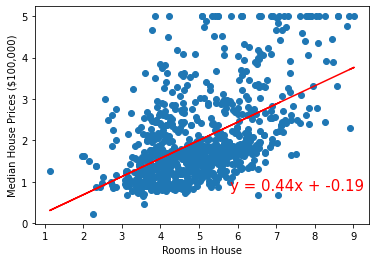

In [5]:
# Add the linear regression equation and line to plot


The r-squared is: 0.27748572828217366


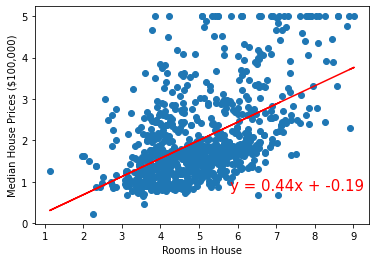

In [6]:
# Print out the r-squared value along with the plot.


# Compare linear relationships with the diabetes dataset

In [32]:
# Read in the diabetes dataset
diabetes_data = datasets.load_diabetes()
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df["1Y_Disease_Progess"] = diabetes_data.target

#Check the dataset
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,1Y_Disease_Progess
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


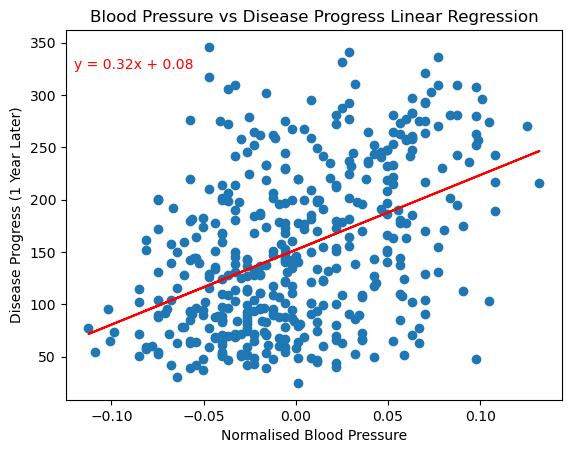

In [40]:
# Plot the different factors in a scatter plot
#Isolate the data
bp = diabetes_df["bp"]
progress = diabetes_df["1Y_Disease_Progess"]

#Calculate the linear regression
(slope_db, intercept_db, rvalue_db, pvalue_db, stderr_db) = linregress(bp, progress)
regress_values_db = bp * slope_db + intercept_db

#Plot the scatterplot values
plt.scatter(bp, progress)
plt.title("Blood Pressure vs Disease Progress Linear Regression")
plt.xlabel("Normalised Blood Pressure")
plt.ylabel("Disease Progress (1 Year Later)")

#Add the linear regression line
plt.plot(bp, regress_values_db, "r-")

#Add the linear regression equation
plt.text(-0.120, 325, f'{line_eq}', color="red")

#Save and display the plot
plt.savefig("Blood Pressure vs Disease Progress Linear Regression.png")
plt.show()